In [1]:
import pandas as pd
import tensorflow as tf

from window import WindowGenerator
from utils import train_test_val_split

## Datasets

In [2]:
case_1 = pd.read_csv("datasets/case_1.csv")
case_2 = pd.read_csv("datasets/case_2.csv")
case_3 = pd.read_csv("datasets/case_3.csv")
case_4 = pd.read_csv("datasets/case_4.csv")
case_5 = pd.read_csv("datasets/case_5.csv")

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Case 1

In [5]:
train_df, test_df, val_df = train_test_val_split(case_1)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(128, 272)
(36, 272)
(19, 272)


In [6]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [7]:
label_columns = outlets

## Window generation

In [8]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    
    )
    
single_step_window


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [9]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-21 21:48:19.715460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 21:48:19.715587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


2022-07-21 21:48:20.043369: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=136), # 136
    tf.keras.layers.Dense(units=68), # 136
    tf.keras.layers.Dense(units=136) # 136
])

In [11]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [12]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
)

wide_window


Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59',

In [13]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


## Model creation

In [14]:
MAX_EPOCHS = 30

In [15]:
linear.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [16]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    verbose=0
    # callbacks=[early_stopping]
)

2022-07-21 21:48:21.799490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-21 21:48:22.388861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [17]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


In [18]:
tf.keras.utils.plot_model(linear, "models/linear.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


label_col_index 135


2022-07-21 21:48:35.638355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


label_col_index 135
label_col_index 135


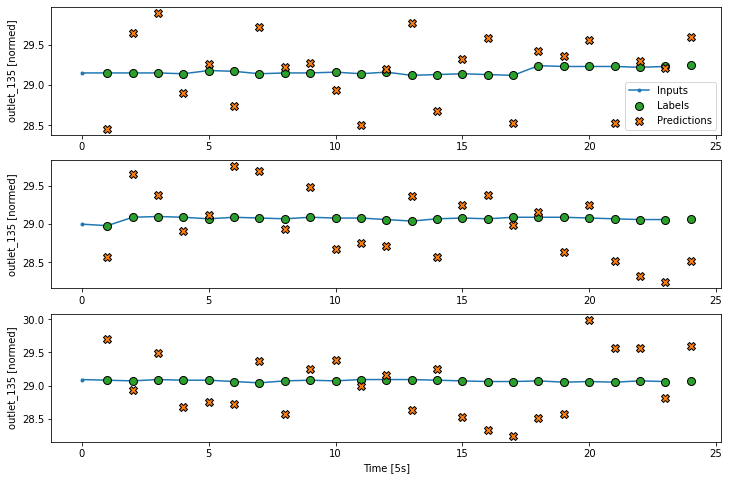

In [19]:
wide_window.plot(linear, plot_col="outlet_135")

In [20]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

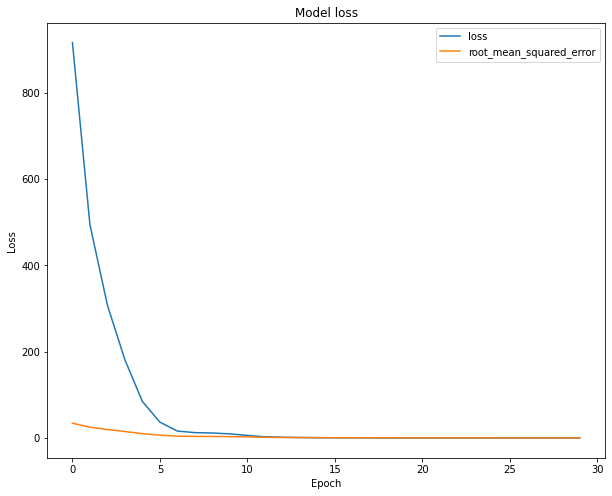

In [21]:
losses[['loss', 'root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [109]:
linear.evaluate(single_step_window.test)

3/3 [==============================] - 0s 11ms/step - loss: 0.6699 - root_mean_squared_error: 0.9169


[0.6699275374412537, 0.9169095158576965]

## Case 2

In [22]:
train_df, test_df, val_df = train_test_val_split(case_2)
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(142, 272)
(41, 272)
(21, 272)


In [23]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [24]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    
    )
    
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [25]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [26]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 0s 79ms/step - loss: 5.1145 - root_mean_squared_error: 2.5702 - val_loss: 3.1943 - val_root_mean_squared_error: 2.0014
Epoch 2/30
5/5 [==============================] - 0s 72ms/step - loss: 2.6382 - root_mean_squared_error: 1.8525 - val_loss: 1.6893 - val_root_mean_squared_error: 1.4495
Epoch 3/30
5/5 [==============================] - 0s 71ms/step - loss: 1.5440 - root_mean_squared_error: 1.4084 - val_loss: 0.9710 - val_root_mean_squared_error: 1.1059
Epoch 4/30
5/5 [==============================] - 0s 72ms/step - loss: 0.9292 - root_mean_squared_error: 1.0915 - val_loss: 0.8211 - val_root_mean_squared_error: 1.0111
Epoch 5/30
5/5 [==============================] - 0s 72ms/step - loss: 0.7394 - root_mean_squared_error: 0.9731 - val_loss: 0.6413 - val_root_mean_squared_error: 0.8989
Epoch 6/30
5/5 [==============================] - 0s 72ms/step - loss: 0.5761 - root_mean_squared_error: 0.8584 - val_loss: 0.4621 - val_root_mean_squared_

In [27]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


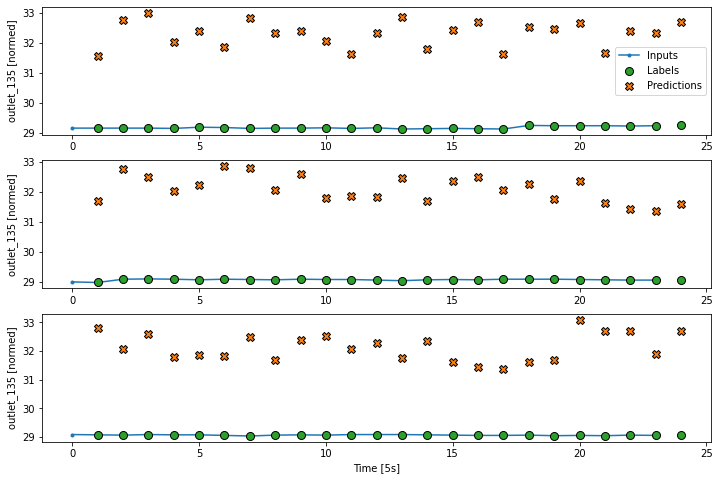

In [28]:
wide_window.plot(linear, plot_col="outlet_135")

In [29]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

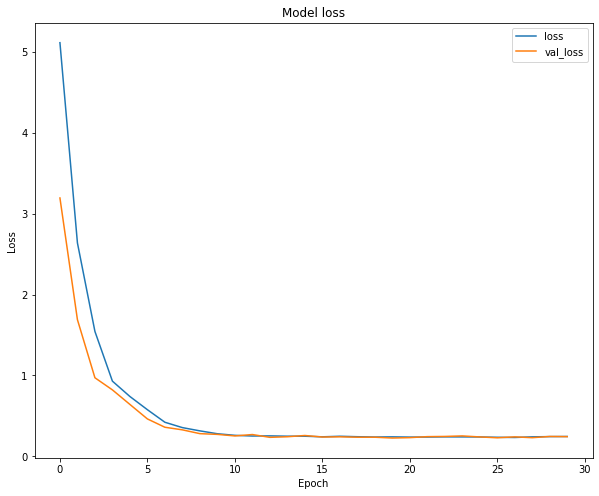

In [30]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

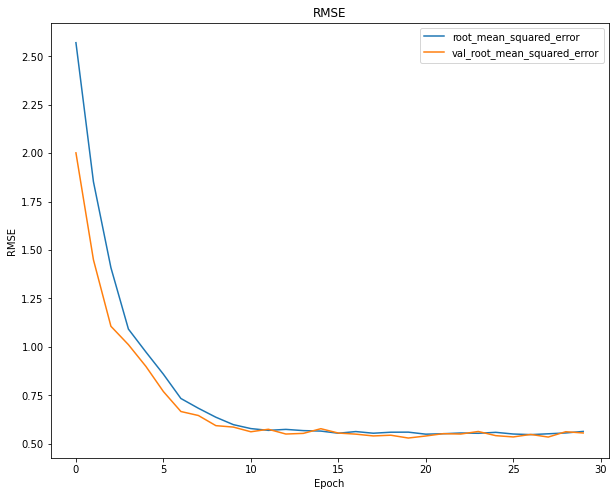

In [31]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [ ]:
linear.evaluate(single_step_window.test)

## Case 3


In [32]:
train_df, test_df, val_df = train_test_val_split(case_3)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (147, 272)
val shape: (42, 272)
test shape: (22, 272)


In [33]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [34]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
    
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [35]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [36]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
5/5 [==============================] - 0s 80ms/step - loss: 37.7243 - root_mean_squared_error: 6.9623 - val_loss: 23.8338 - val_root_mean_squared_error: 5.4469
Epoch 2/30
5/5 [==============================] - 0s 72ms/step - loss: 16.8374 - root_mean_squared_error: 4.6564 - val_loss: 10.6138 - val_root_mean_squared_error: 3.6357
Epoch 3/30
5/5 [==============================] - 0s 71ms/step - loss: 8.3159 - root_mean_squared_error: 3.2728 - val_loss: 6.1312 - val_root_mean_squared_error: 2.7639
Epoch 4/30
5/5 [==============================] - 0s 72ms/step - loss: 5.5330 - root_mean_squared_error: 2.6651 - val_loss: 4.3330 - val_root_mean_squared_error: 2.3233
Epoch 5/30
5/5 [==============================] - 0s 71ms/step - loss: 4.0108 - root_mean_squared_error: 2.2632 - val_loss: 3.2176 - val_root_mean_squared_error: 1.9895
Epoch 6/30
5/5 [==============================] - 0s 73ms/step - loss: 2.6545 - root_mean_squared_error: 1.8414 - val_loss: 1.8511 - val_root_mean_squa

In [37]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


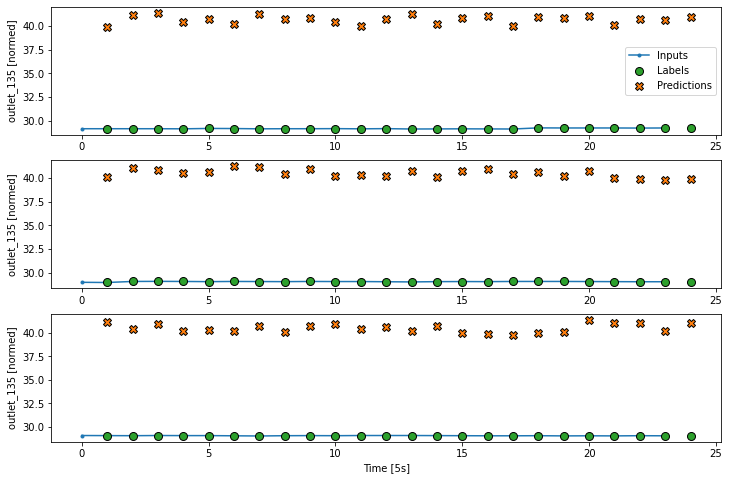

In [38]:
wide_window.plot(linear, plot_col="outlet_135")

In [39]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

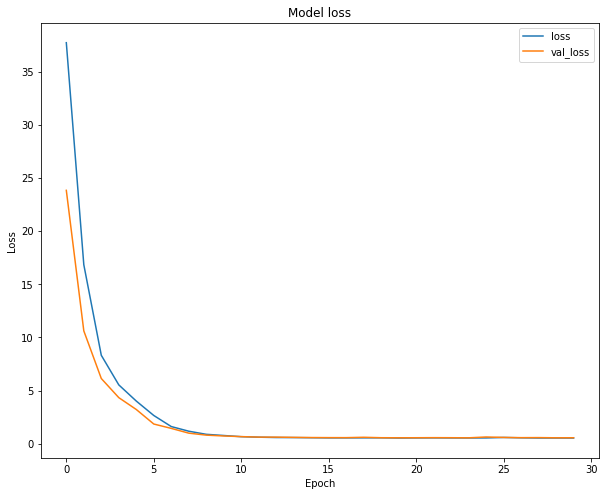

In [40]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [108]:
linear.evaluate(single_step_window.test)

3/3 [==============================] - 0s 9ms/step - loss: 0.6699 - root_mean_squared_error: 0.9144


[0.6699274182319641, 0.914355456829071]

## Case 4

In [41]:
train_df, test_df, val_df = train_test_val_split(case_4)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (259, 272)
val shape: (74, 272)
test shape: (38, 272)


In [42]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [43]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [44]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [45]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    # callbacks=[early_stopping]
)

Epoch 1/30
9/9 [==============================] - 0s 48ms/step - loss: 8.4387 - root_mean_squared_error: 3.3415 - val_loss: 4.3007 - val_root_mean_squared_error: 2.3323
Epoch 2/30
9/9 [==============================] - 0s 41ms/step - loss: 4.9190 - root_mean_squared_error: 2.5389 - val_loss: 5.4557 - val_root_mean_squared_error: 2.6402
Epoch 3/30
9/9 [==============================] - 0s 42ms/step - loss: 4.0134 - root_mean_squared_error: 2.2878 - val_loss: 2.7836 - val_root_mean_squared_error: 1.8861
Epoch 4/30
9/9 [==============================] - 0s 41ms/step - loss: 3.2248 - root_mean_squared_error: 2.0481 - val_loss: 2.3015 - val_root_mean_squared_error: 1.7071
Epoch 5/30
9/9 [==============================] - 0s 41ms/step - loss: 2.8316 - root_mean_squared_error: 1.9259 - val_loss: 2.2599 - val_root_mean_squared_error: 1.7015
Epoch 6/30
9/9 [==============================] - 0s 41ms/step - loss: 2.6152 - root_mean_squared_error: 1.8578 - val_loss: 1.9768 - val_root_mean_squared_

In [46]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


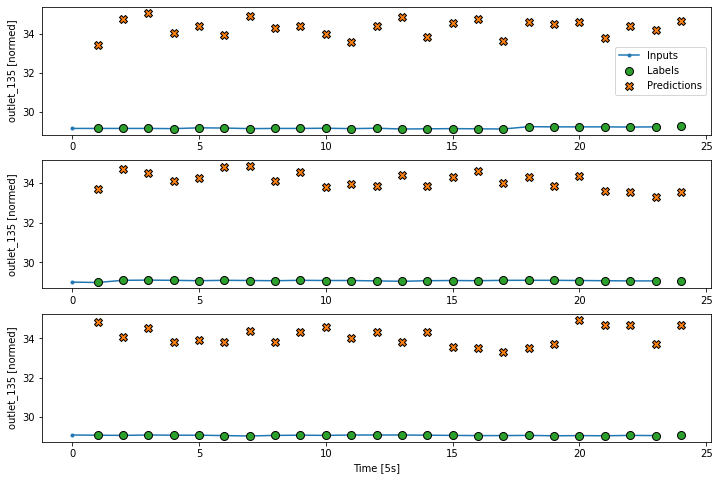

In [47]:
wide_window.plot(linear, plot_col="outlet_135")

In [48]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

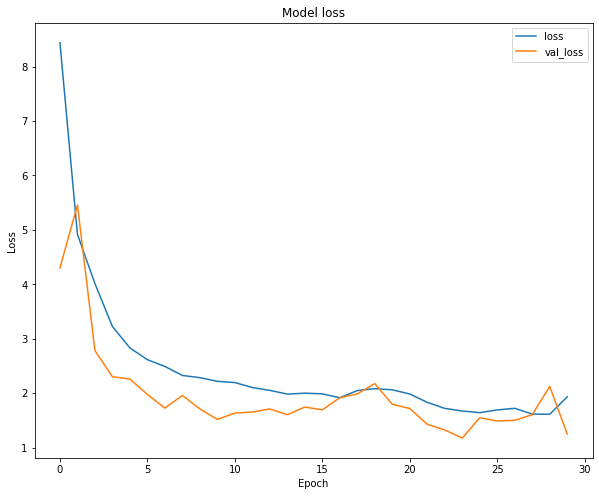

In [49]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [107]:
linear.evaluate(single_step_window.test)

3/3 [==============================] - 0s 10ms/step - loss: 0.6699 - root_mean_squared_error: 0.9169


[0.6699272990226746, 0.9168775081634521]

## Case 5

In [50]:
train_df, test_df, val_df = train_test_val_split(case_5)
print("train shape:", train_df.shape)
print("val shape:", val_df.shape)
print("test shape:", test_df.shape)

train shape: (548, 272)
val shape: (156, 272)
test shape: (79, 272)


In [51]:
# train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

In [52]:
# Generate window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df,
    val_df=val_df, test_df=test_df,
    label_columns=label_columns
    )
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['outlet_fan_speed', 'outlet_1', 'outlet_2', 'outlet_3', 'outlet_4', 'outlet_5', 'outlet_6', 'outlet_7', 'outlet_8', 'outlet_9', 'outlet_10', 'outlet_11', 'outlet_12', 'outlet_13', 'outlet_14', 'outlet_15', 'outlet_16', 'outlet_17', 'outlet_18', 'outlet_19', 'outlet_20', 'outlet_21', 'outlet_22', 'outlet_23', 'outlet_24', 'outlet_25', 'outlet_26', 'outlet_27', 'outlet_28', 'outlet_29', 'outlet_30', 'outlet_31', 'outlet_32', 'outlet_33', 'outlet_34', 'outlet_35', 'outlet_36', 'outlet_37', 'outlet_38', 'outlet_39', 'outlet_40', 'outlet_41', 'outlet_42', 'outlet_43', 'outlet_44', 'outlet_45', 'outlet_46', 'outlet_47', 'outlet_48', 'outlet_49', 'outlet_50', 'outlet_51', 'outlet_52', 'outlet_53', 'outlet_54', 'outlet_55', 'outlet_56', 'outlet_57', 'outlet_58', 'outlet_59', 'outlet_60', 'outlet_61', 'outlet_62', 'outlet_63', 'outlet_64', 'outlet_65', 'outlet_66', 'outlet_67', 'outlet_68', 'outlet_69', 'outlet_70

In [53]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 272)
Labels shape (batch, time, features): (32, 1, 136)


In [106]:
history = linear.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val,
    verbose=0,
    # callbacks=[early_stopping],
)

In [55]:
for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 272)
Labels shape (batch, time, features): (32, 24, 136)


label_col_index 135
label_col_index 135
label_col_index 135


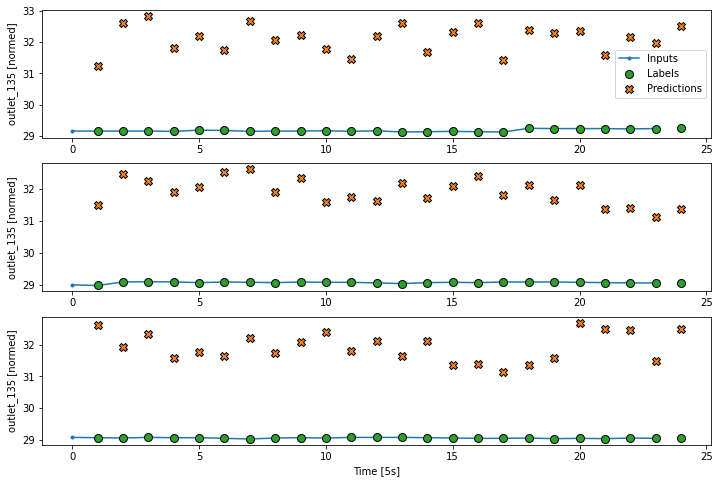

In [56]:
wide_window.plot(linear, plot_col="outlet_135")

In [57]:
losses = pd.DataFrame(history.history)

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

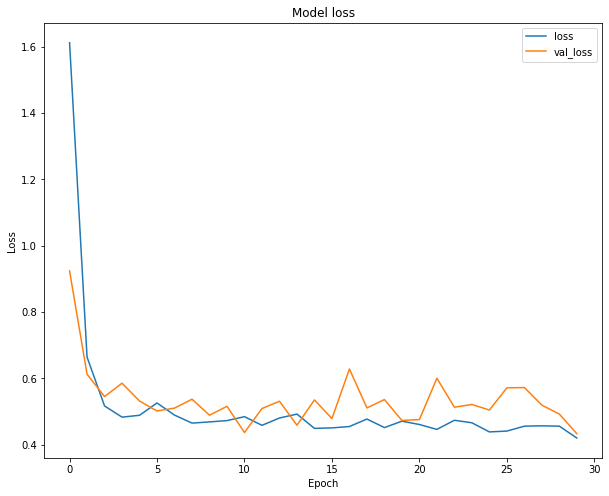

In [58]:
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

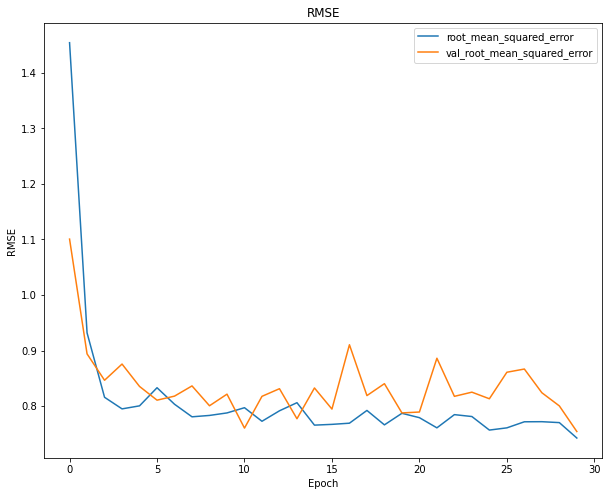

In [59]:
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [105]:
linear.evaluate(single_step_window.test)

3/3 [==============================] - 0s 21ms/step - loss: 0.5170 - root_mean_squared_error: 0.8005


[0.5169694423675537, 0.8005210161209106]